# Text Analytics and Mining

- Unstructured text data is being generated all the time

- Text analytics / Text mining involves techniques and algorithms for analyzing text

- Traditional data mining techniques may be used if text is converted to numerical vectors


## Key Techniques
- NLTK: stemming, stopwords, punctuation, top words
- WordCloud: visualization
- TF-IDF Vectorizer with sklearn
- Topic Modeling with gensim
- Sentiment analysis with TextBlob

### Fig. Text Mining Process

# 1. Text Preprocessing with NLTK (Natural Language Toolkit)

To properly use NLTK, you need to download various text corpa by running:
- import nltk
- nltk.download()

Otherwise, you may see error messages.

In [ ]:
!pip install --upgrade nltk
!conda install nltk
!conda list

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download()

## (1) Removing Punctuations & Nomalization

In [2]:
s = "Hello!! 2019 was great, isn't it? So is 2020!!!"

In [3]:
import string 
p = string.punctuation
print(p)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


> **maketrans(< intabstring >, < outtabstring >)** returns a translation table that maps each character in the intabstring into the character at the same position in the outtab string. 
>
> Then this table is passed to the translate() function.

In [4]:
p_out = len(p) * " "

In [5]:
p_out

'                                '

In [6]:
table_p = str.maketrans(p, p_out)
table_p

{33: 32,
 34: 32,
 35: 32,
 36: 32,
 37: 32,
 38: 32,
 39: 32,
 40: 32,
 41: 32,
 42: 32,
 43: 32,
 44: 32,
 45: 32,
 46: 32,
 47: 32,
 58: 32,
 59: 32,
 60: 32,
 61: 32,
 62: 32,
 63: 32,
 64: 32,
 91: 32,
 92: 32,
 93: 32,
 94: 32,
 95: 32,
 96: 32,
 123: 32,
 124: 32,
 125: 32,
 126: 32}

In [7]:
s.translate(table_p).lower()

'hello   2019 was great  isn t it  so is 2020   '

## (2) Stemming & Lemmatization

- Stemming is the process for reducing inflected (or sometimes derived) words to their stem, base or root form—generally a written word form. 
- Lemmatisation (or lemmatization) in linguistics, is the process of grouping together the different inflected forms of a word so they can be analysed as a single item.
- Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.

In [8]:
from nltk.stem.lancaster import LancasterStemmer
ls = LancasterStemmer()

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

from nltk.stem.snowball import SnowballStemmer
ss = SnowballStemmer("english") 

from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [9]:
ps.stem('says')

'say'

In [10]:
words = ['string', 'bringing', 'maximum', 'roughly', 'would',
         'multiply', 'provision', 'saying', 'saw', 'dogs', 'churches']

In [13]:
for word in words:
    print('Word: {}\tLancaster: {}\tPorter: {}\tSnowball: {}\tWordNet: {}'.format(word, ls.stem(word), ps.stem(word), ss.stem(word), wnl.lemmatize(word)))

Word: string	Lancaster: string	Porter: string	Snowball: string	WordNet: string
Word: bringing	Lancaster: bring	Porter: bring	Snowball: bring	WordNet: bringing
Word: maximum	Lancaster: maxim	Porter: maximum	Snowball: maximum	WordNet: maximum
Word: roughly	Lancaster: rough	Porter: roughli	Snowball: rough	WordNet: roughly
Word: would	Lancaster: would	Porter: would	Snowball: would	WordNet: would
Word: multiply	Lancaster: multiply	Porter: multipli	Snowball: multipli	WordNet: multiply
Word: provision	Lancaster: provid	Porter: provis	Snowball: provis	WordNet: provision
Word: saying	Lancaster: say	Porter: say	Snowball: say	WordNet: saying
Word: saw	Lancaster: saw	Porter: saw	Snowball: saw	WordNet: saw
Word: dogs	Lancaster: dog	Porter: dog	Snowball: dog	WordNet: dog
Word: churches	Lancaster: church	Porter: church	Snowball: church	WordNet: church


## (3) Removing Stopwords

In [14]:
# Create a List of Words
infile = open('frankenstein.txt')
words = infile.read().lower().split() # Normalization
infile.close()

> ***nltk.FreqDist( ):*** A frequency distribution for the outcomes of an experiment. Formally, a frequency distribution can be defined as a function mapping from each sample to the number of times that sample occurred as an outcome. For example, it will produce a frequency distribution that encodes how often each word occurs in a text.
>
> http://www.nltk.org/api/nltk.html?highlight=freqdist#nltk.probability.FreqDist

In [15]:
# Get Frequent Words
freq = nltk.FreqDist(words)
freq

FreqDist({'the': 4196, 'and': 2976, 'i': 2847, 'of': 2643, 'to': 2094, 'my': 1777, 'a': 1391, 'in': 1129, 'was': 1021, 'that': 1018, ...})

In [16]:
freq['frankenstein']

28

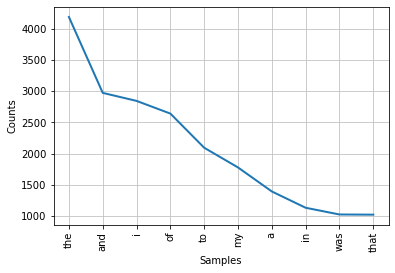

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
# Get a Plot of the Top 10 Most Frequent Words
%matplotlib inline
freq.plot(10)

> ***Most of them are stopwords... We need to remove stopwords...***

In [20]:
stopwords = nltk.corpus.stopwords.words('english')

print(type(stopwords))
print(len(stopwords))
print(stopwords)

<class 'list'>
179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'sam

In [21]:
stopwords.append('would')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
infile = open('frankenstein.txt')
words = infile.read().lower().split() # Normalization
infile.close()

words2 = []
for w in words:
    if w not in stopwords:
        words2.append(w)

print(len(words))
print(len(words2))

75271
34507


In [23]:
# Remove Stopwords From the "words" List
words2 = []
for w in words:
    if w not in stopwords and len(w) > 1:
        words2.append(w)

print(len(words))
print(len(words2))

75271
34487


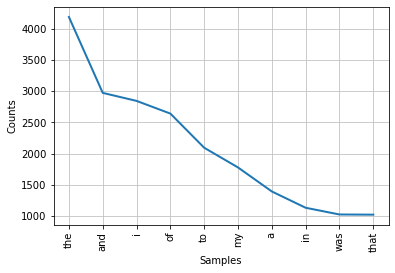

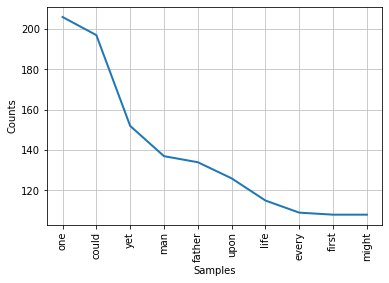

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
freq = nltk.FreqDist(words)
freq2 = nltk.FreqDist(words2)
freq.plot(10)
freq2.plot(10)

## (4) Example: frankenstein.txt

## Getting the Word Frequency After Pre-Processing

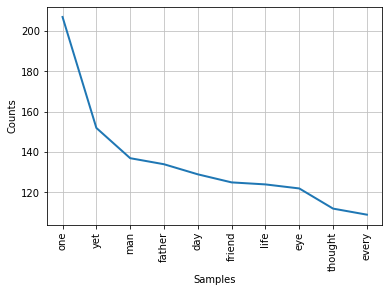

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [25]:
import nltk
import string
from nltk.stem import WordNetLemmatizer
%matplotlib inline

#(1) Load the Data
infile = open('frankenstein.txt')
content = infile.read()
infile.close()

#(2) Normalization and Removing Punctuatiion
p = string.punctuation
table_p = str.maketrans(p, len(p) * " ")

l_content = content.lower() # Normalization
n_content = l_content.translate(table_p) # Removing Punctuation

#(3) Removing Stopwords
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('could')
stopwords.append('would')
stopwords.append('upon')

words = n_content.split()

rs_words = []
for w in words:
    if w not in stopwords:
        rs_words.append(w)

#(4) Lemmatizing
wnl = WordNetLemmatizer()
        
le_words = []
for w in rs_words:
    le_words.append(wnl.lemmatize(w))

#(5) Getting the Word Frequency
freq = nltk.FreqDist(le_words)
freq.plot(10)